<a href="https://colab.research.google.com/github/SharanyaKUMAR22/Tomato-Disease-Detection/blob/main/Tomato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Tomato-Disease-Detection'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 15.80 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/Tomato-Disease-Detection/Tomato-Disease-Detection/Tomato-Disease-Detection/Tomato-Disease-Detection
Model loaded successfully!


Saving Screenshot 2026-02-12 033035.png to Screenshot 2026-02-12 033035.png
Prediction: Tomato___Septoria_leaf_spot
Confidence: 99.4725%


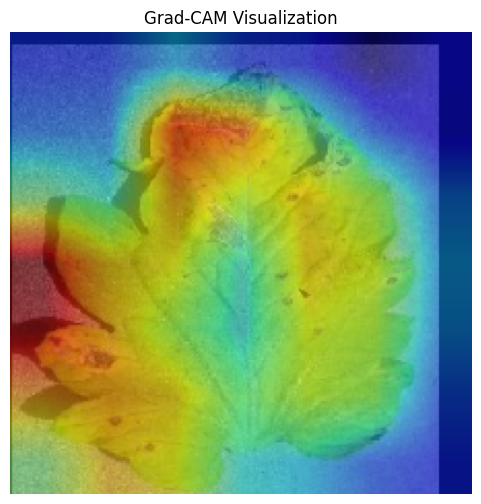

In [4]:
!git clone https://github.com/SharanyaKUMAR22/Tomato-Disease-Detection.git
%cd Tomato-Disease-Detection

import tensorflow as tf
import json
import warnings
warnings.filterwarnings("ignore")


model = tf.keras.models.load_model("tomato_disease_model.keras")

with open("class_names.json") as f:
    class_names = json.load(f)

    print("Model loaded successfully!")
    from google.colab import files
    from tensorflow.keras.applications.efficientnet import preprocess_input
    import numpy as np

    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model(img_array, training=False)


    idx = np.argmax(preds[0])
    temperature = 2.0
    scaled_preds = tf.nn.softmax(tf.math.log(preds) / temperature)
    confidence = scaled_preds[0][idx] * 100

    print(f"Prediction: {class_names[idx]}")
    print(f"Confidence: {confidence:.4f}%")
    from gradcam import make_gradcam_heatmap
    import matplotlib.pyplot as plt
    import cv2

    # Generate heatmap
    heatmap = make_gradcam_heatmap(img_array, model, "top_conv")

    # Resize heatmap
    heatmap = cv2.resize(heatmap, (224, 224))

    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imshow(heatmap, cmap="jet", alpha=0.5)
    plt.axis("off")
    plt.title("Grad-CAM Visualization")
    plt.show()



